# Ai4Good - Male Breast Cancer Challenge

## Machine Learning Interpretability

In [ ]:
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
import os
os.chdir("/gdrive/My Drive/Ai4Good - Male Breast Cancer/")

In [ ]:
import pandas as pd
X_train = pd.read_csv('X_train.csv')
X_train.head(3)

mean radius  mean texture  ...  worst symmetry  worst fractal dimension
0        14.22         23.12  ...          0.5166                  0.14460
1        18.46         18.52  ...          0.3695                  0.08579
2        13.40         20.52  ...          0.3585                  0.11090

[3 rows x 30 columns]

In [ ]:
y_train = pd.read_csv('y_train.csv', squeeze=True) # squeeze is used because otherwise y_train is loaded as a dataframe, not a series
y_train

0      0
1      0
2      0
3      0
4      1
      ..
450    0
451    1
452    1
453    1
454    0
Name: 0, Length: 455, dtype: int64

In [ ]:
import xgboost as xgb
clf = xgb.XGBClassifier(random_state=1)

In [ ]:
clf.fit(X_train, y_train);

In [ ]:
!pip install shap
# https://github.com/slundberg/shap
# https://www.youtube.com/watch?v=aThG4YAFErw
# https://www.youtube.com/watch?v=ngOBhhINWb8

In [ ]:
import shap

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[0,:], X_train.iloc[0,:], link='logit')

In [ ]:
X_train.iloc[0,:]

mean radius                 14.22000
mean texture                23.12000
mean perimeter              94.37000
mean area                  609.90000
mean smoothness              0.10750
mean compactness             0.24130
mean concavity               0.19810
mean concave points          0.06618
mean symmetry                0.23840
mean fractal dimension       0.07542
radius error                 0.28600
texture error                2.11000
perimeter error              2.11200
area error                  31.72000
smoothness error             0.00797
compactness error            0.13540
concavity error              0.11660
concave points error         0.01666
symmetry error               0.05113
fractal dimension error      0.01172
worst radius                15.74000
worst texture               37.18000
worst perimeter            106.40000
worst area                 762.40000
worst smoothness             0.15330
worst compactness            0.93270
worst concavity              0.84880
w

In [ ]:
y_train[0]

0

In [ ]:
y_train[y_train==1].index # let's do it for a positive example

Int64Index([  4,   6,   7,   8,   9,  11,  13,  15,  16,  17,
            ...
            439, 440, 441, 443, 444, 445, 446, 451, 452, 453],
           dtype='int64', length=285)

In [ ]:
shap.initjs()


# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(clf)
shap_values = explainer.shap_values(X_train)

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[4,:], X_train.iloc[4,:], link='logit')

In [ ]:
# load JS visualization code to notebook
shap.initjs()
# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, shap_values[7,:], X_train.iloc[7,:], link='logit')

In [ ]:
X_train.shape

(455, 30)

In [ ]:
shap.initjs()
# visualize the training set predictions
shap.force_plot(explainer.expected_value, shap_values, X_train, link='logit')

invalid value encountered in true_divide
invalid value encountered in true_divide


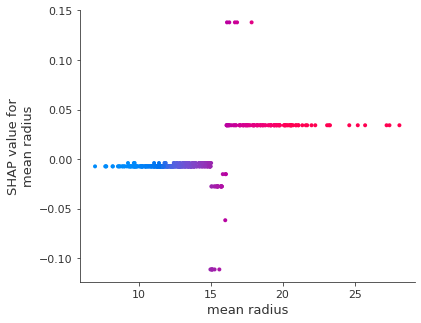

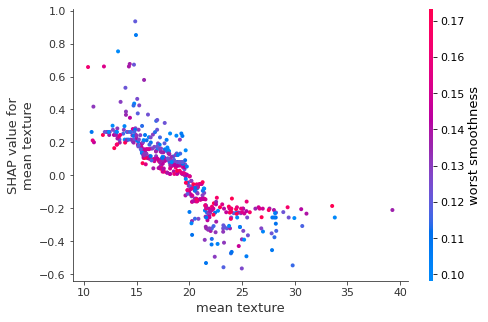

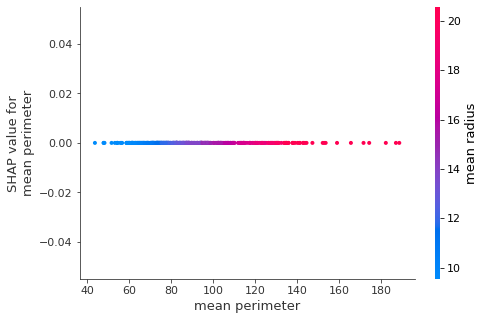

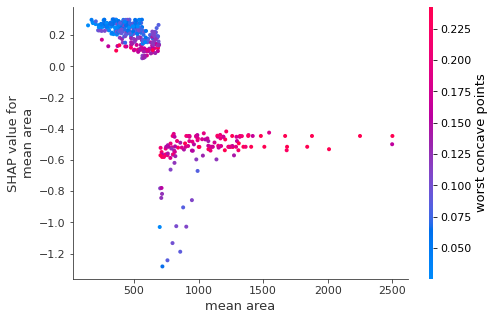

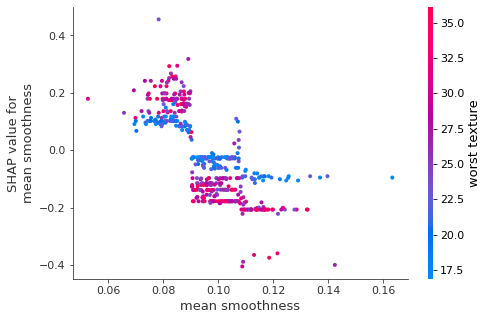

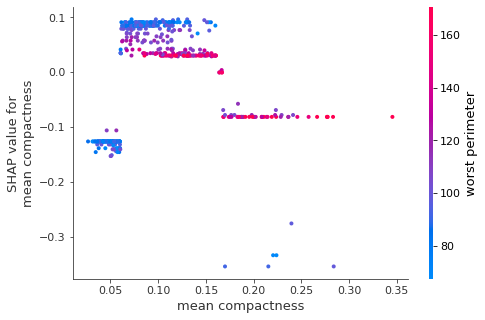

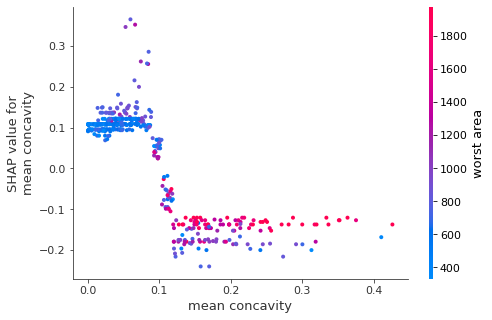

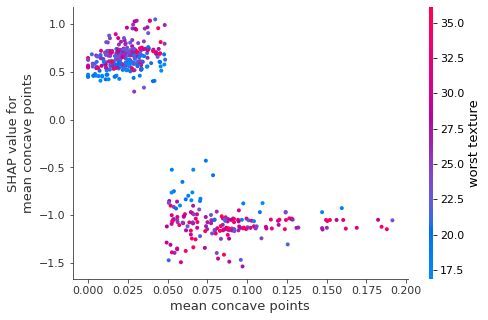

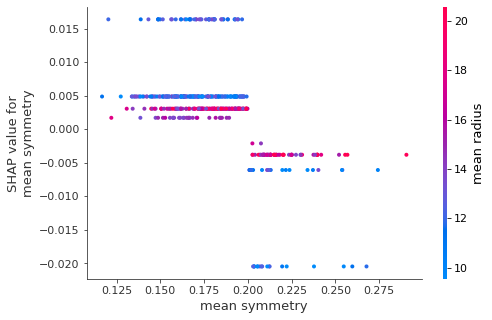

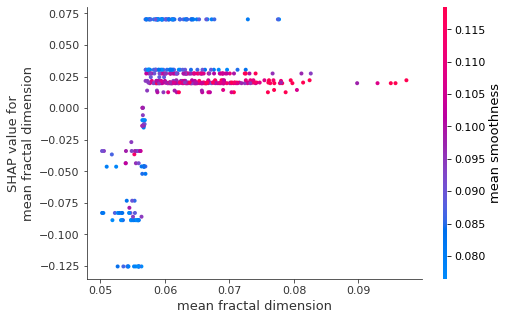

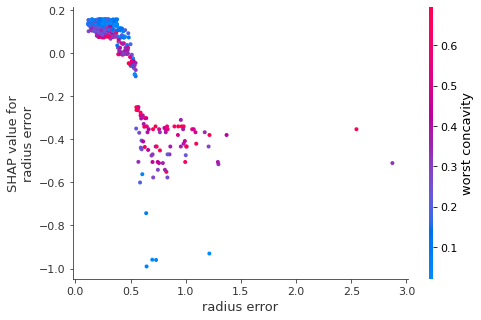

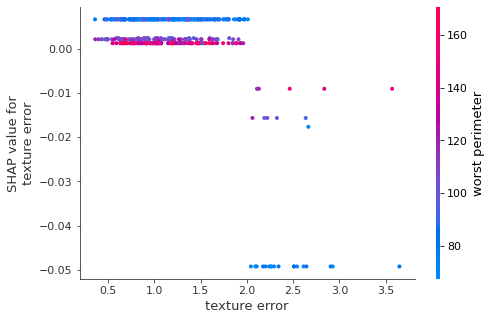

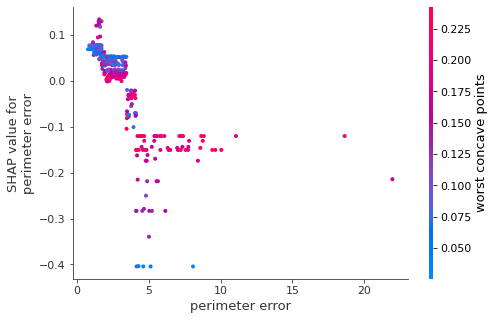

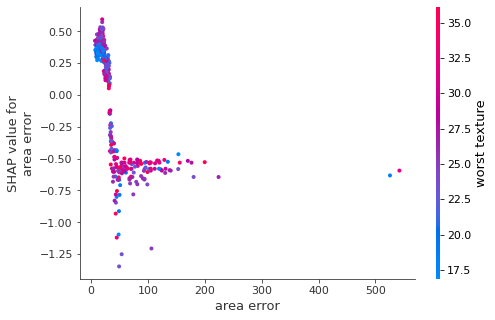

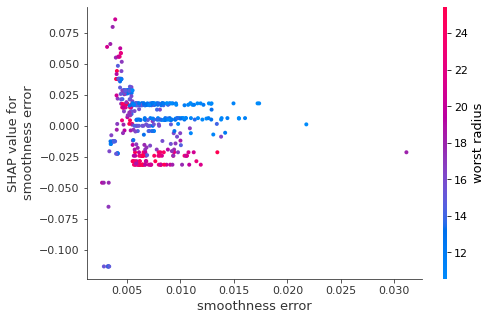

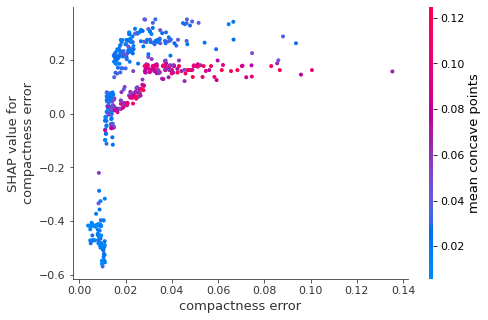

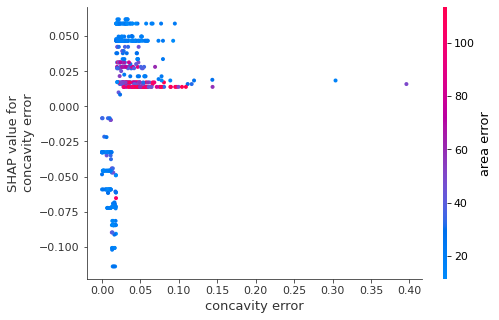

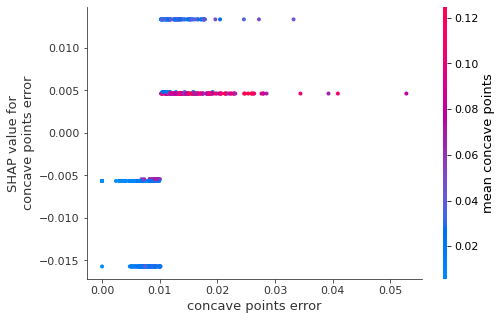

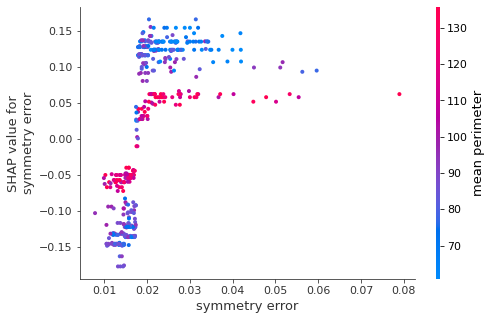

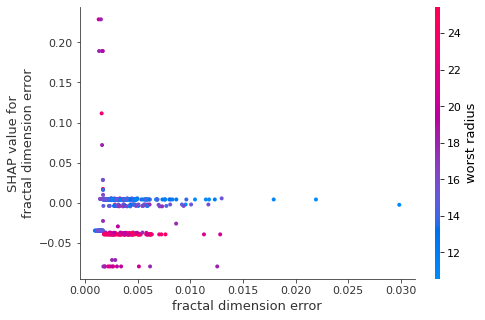

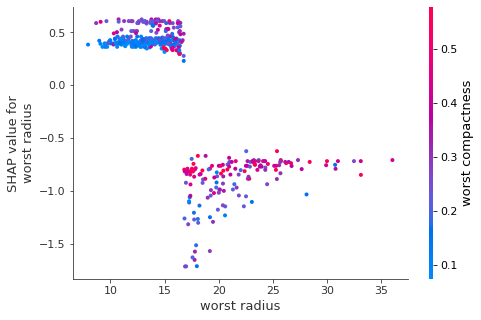

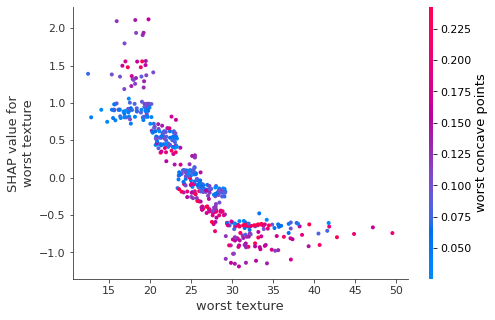

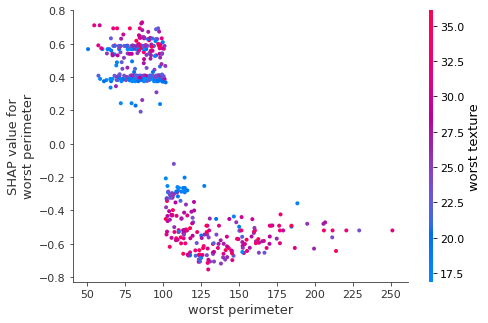

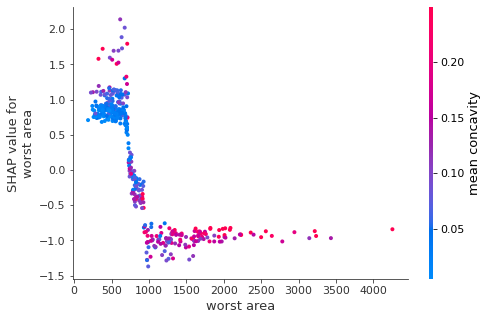

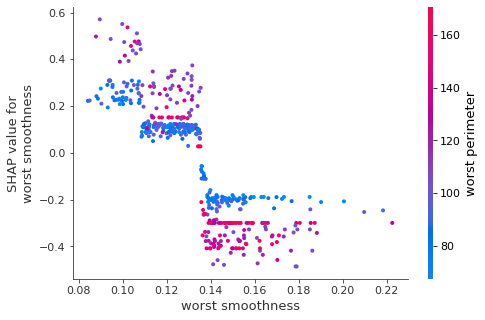

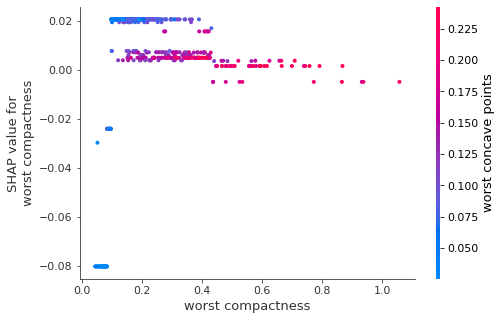

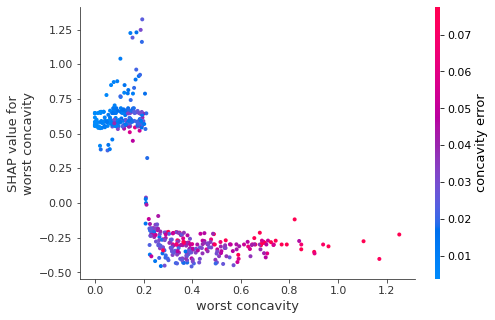

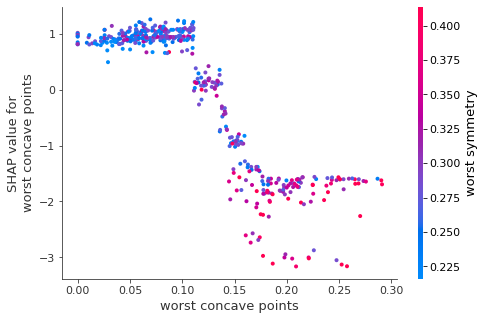

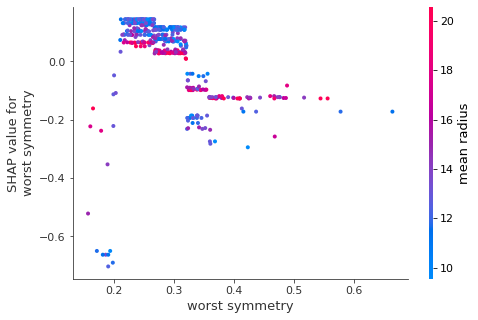

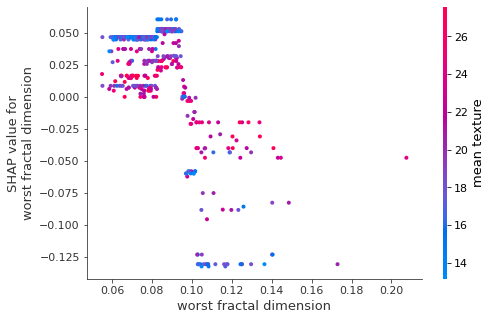

In [ ]:
shap.initjs()
for name in X_train.columns:
    shap.dependence_plot(name, shap_values, X_train)

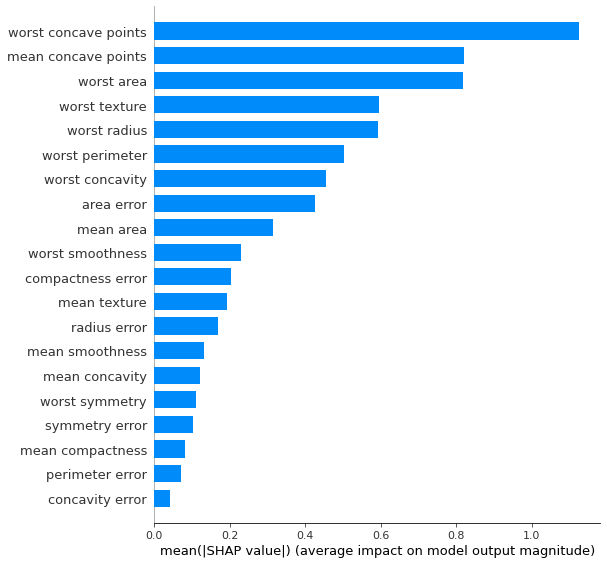

In [ ]:
shap.initjs()
shap.summary_plot(shap_values, X_train, plot_type="bar")

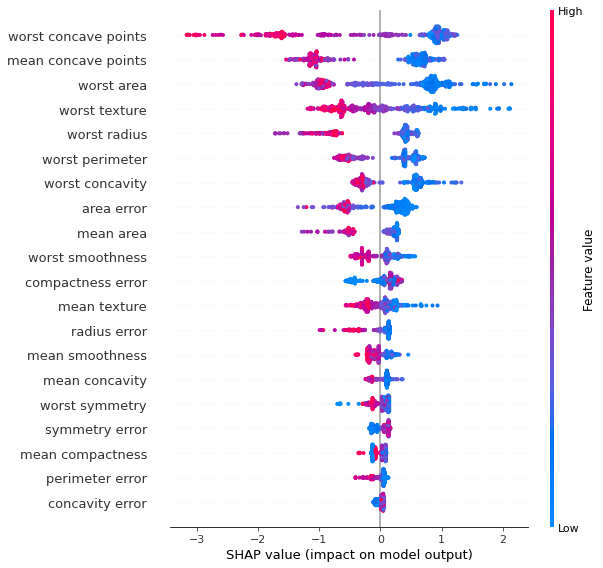

In [ ]:
shap.initjs()
# summarize the effects of all the features
shap.summary_plot(shap_values, X_train)

### Advanced option

In Part 2, we learn how to use sklearn pipelines and GridSearchCV. We dumped our GridSearchCV option into a joblib file. This is how to retrieve and use it with shap.

In [ ]:
from joblib import load
grid = load('grid.joblib')

In [ ]:
grid.best_estimator_.named_steps

{'columntransformer': ColumnTransformer(n_jobs=None, remainder='drop', sparse_threshold=0.3,
                   transformer_weights=None,
                   transformers=[('standardscaler',
                                  StandardScaler(copy=True, with_mean=True,
                                                 with_std=True),
                                  Index(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
        'mean smoothness', 'mean compactness', 'mean concavity',
        'mean concave points', 'mean symmetry', 'mean fractal dimension',
        'radius error', 'texture error', 'perimeter error', 'area error',
        'smoothness error', 'compactness error', 'concavity error',
        'concave points error', 'symmetry error', 'fractal dimension error',
        'worst radius', 'worst texture', 'worst perimeter', 'worst area',
        'worst smoothness', 'worst compactness', 'worst concavity',
        'worst concave points', 'worst symmetry', 'worst fractal d

In [ ]:
model = grid.best_estimator_.named_steps.xgbclassifier

In [ ]:
grid.best_estimator_.named_steps.selectfrommodel.transform(grid.best_estimator_.named_steps.columntransformer.transform(X_train))

array([[ 0.05563811,  0.89626203,  0.12598506, ...,  2.65092757,
         0.92395547,  3.51208834],
       [ 1.27666753, -0.18552085,  1.23829341, ...,  0.17016258,
         0.72724847,  1.20540467],
       [-0.18050438,  0.28481953, -0.1124559 , ...,  1.07712393,
         1.34611894,  1.03291303],
       ...,
       [-0.72190422, -1.02978185, -0.72707596, ..., -0.45945195,
        -0.30349618, -0.41131243],
       [-0.53183831, -1.22967651, -0.58642492, ..., -1.10740115,
        -1.47708037, -0.99307969],
       [ 1.48689193, -0.79225995,  1.45467962, ..., -0.24539232,
         0.93152112, -0.75786382]])

In [ ]:
!pip install shap

In [ ]:
import shap
import numpy as np

# load JS visualization code to notebook
shap.initjs()

# explain the model's predictions using SHAP
# (same syntax works for LightGBM, CatBoost, scikit-learn and spark models)
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(grid.best_estimator_.named_steps.selectfrommodel.transform(grid.best_estimator_.named_steps.columntransformer.transform(X_train)))

# visualize the first prediction's explanation (use matplotlib=True to avoid Javascript)
shap.force_plot(explainer.expected_value, np.round(shap_values[0,:],3), np.round(grid.best_estimator_.named_steps.selectfrommodel.transform(grid.best_estimator_.named_steps.columntransformer.transform(X_train))[0,:],3), link='logit')